In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [22]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [23]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [25]:
data.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [26]:
print("Dataset shape:", data.shape)

Dataset shape: (3755, 11)


In [27]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [28]:
data.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


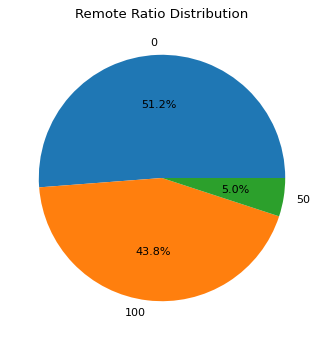

In [29]:
plt.figure(figsize=(6,5),dpi=80)
level_counts = data['remote_ratio'].value_counts()
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Remote Ratio Distribution')
plt.show()

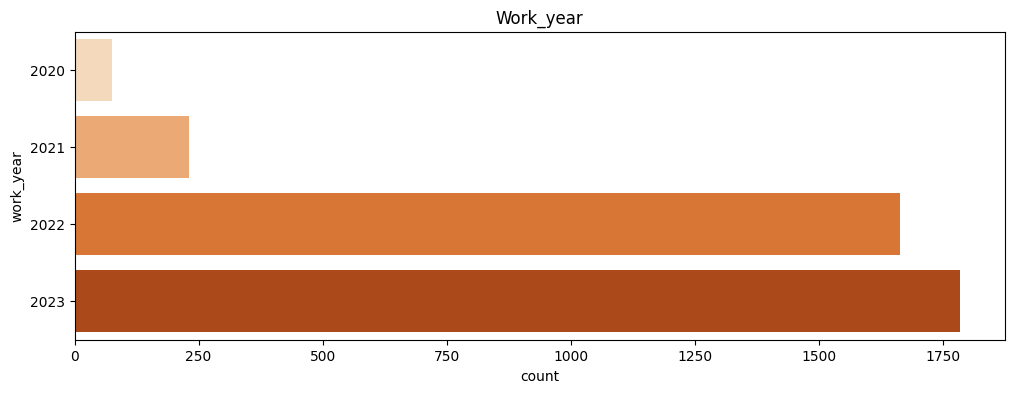

In [30]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['work_year'],palette='Oranges')
plt.title('Work_year')
plt.show()

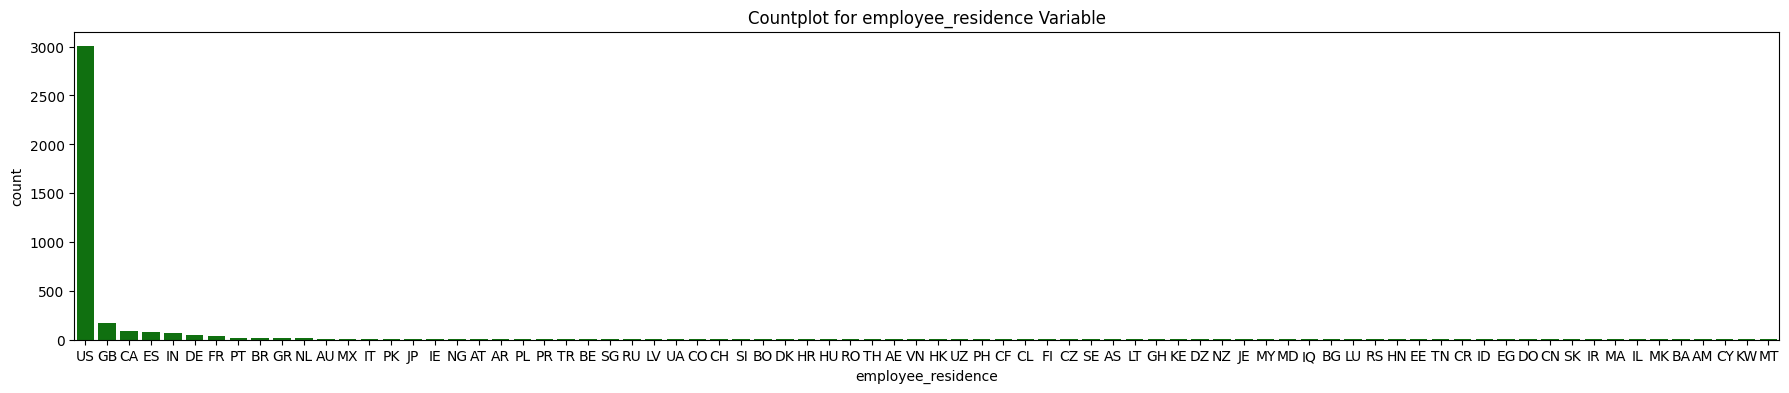

In [31]:
plt.figure(figsize=[22,4])
sns.countplot(x = data['employee_residence'],order = data['employee_residence'].value_counts().index,color='Green')
plt.title('Countplot for employee_residence Variable')
plt.show()

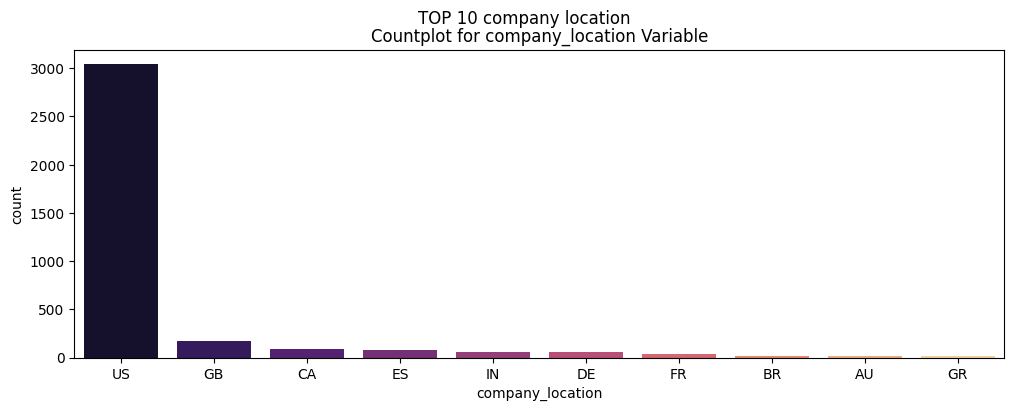

In [32]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_location'],order = data['company_location'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for company_location Variable')
plt.suptitle("TOP 10 company location")
plt.show()

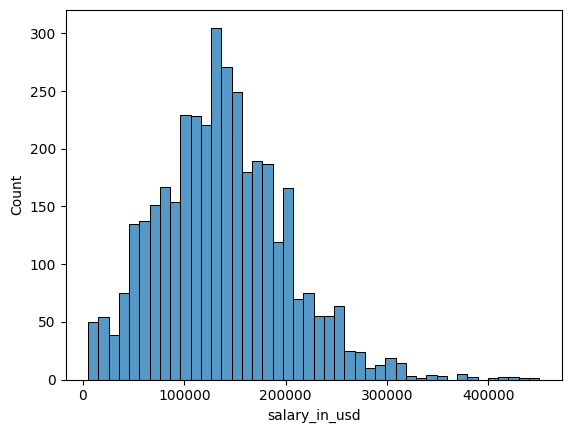

In [33]:
sns.histplot(data=data, x='salary_in_usd')
plt.show()

In [34]:
data = data.drop(['salary', 'salary_currency'], axis=1)
data.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,US,0,US,M


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col1 = ['employment_type', 'job_title', 'employee_residence', 'company_location','experience_level','company_size' ]
data[col1] = data[col1].apply(LabelEncoder().fit_transform)
print(data)

      work_year  experience_level  employment_type  job_title  salary_in_usd  \
0          2023                 3                2         84          85847   
1          2023                 2                0         66          30000   
2          2023                 2                0         66          25500   
3          2023                 3                2         47         175000   
4          2023                 3                2         47         120000   
...         ...               ...              ...        ...            ...   
3750       2020                 3                2         47         412000   
3751       2021                 2                2         84         151000   
3752       2020                 0                2         47         105000   
3753       2020                 0                0         17         100000   
3754       2021                 3                2         45          94665   

      employee_residence  remote_ratio 

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'experience_level'}>,
        <Axes: title={'center': 'employment_type'}>],
       [<Axes: title={'center': 'job_title'}>,
        <Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'employee_residence'}>],
       [<Axes: title={'center': 'remote_ratio'}>,
        <Axes: title={'center': 'company_location'}>,
        <Axes: title={'center': 'company_size'}>]], dtype=object)

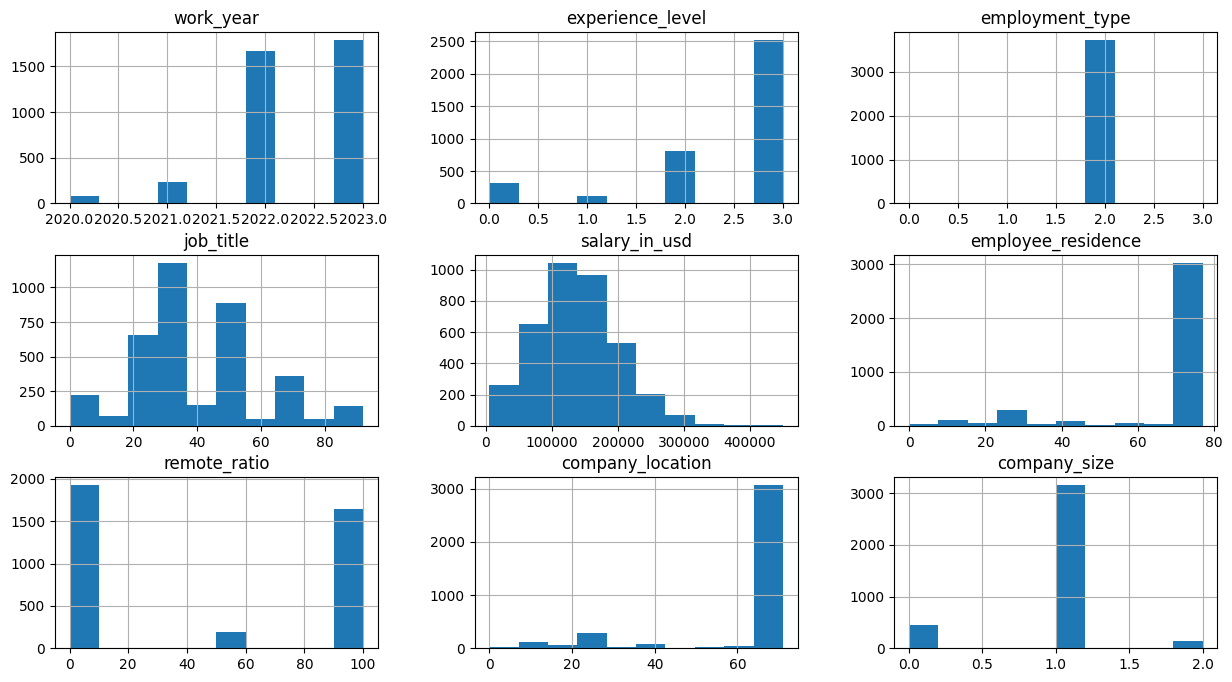

In [36]:
data.hist(figsize=(15,8))

<Axes: >

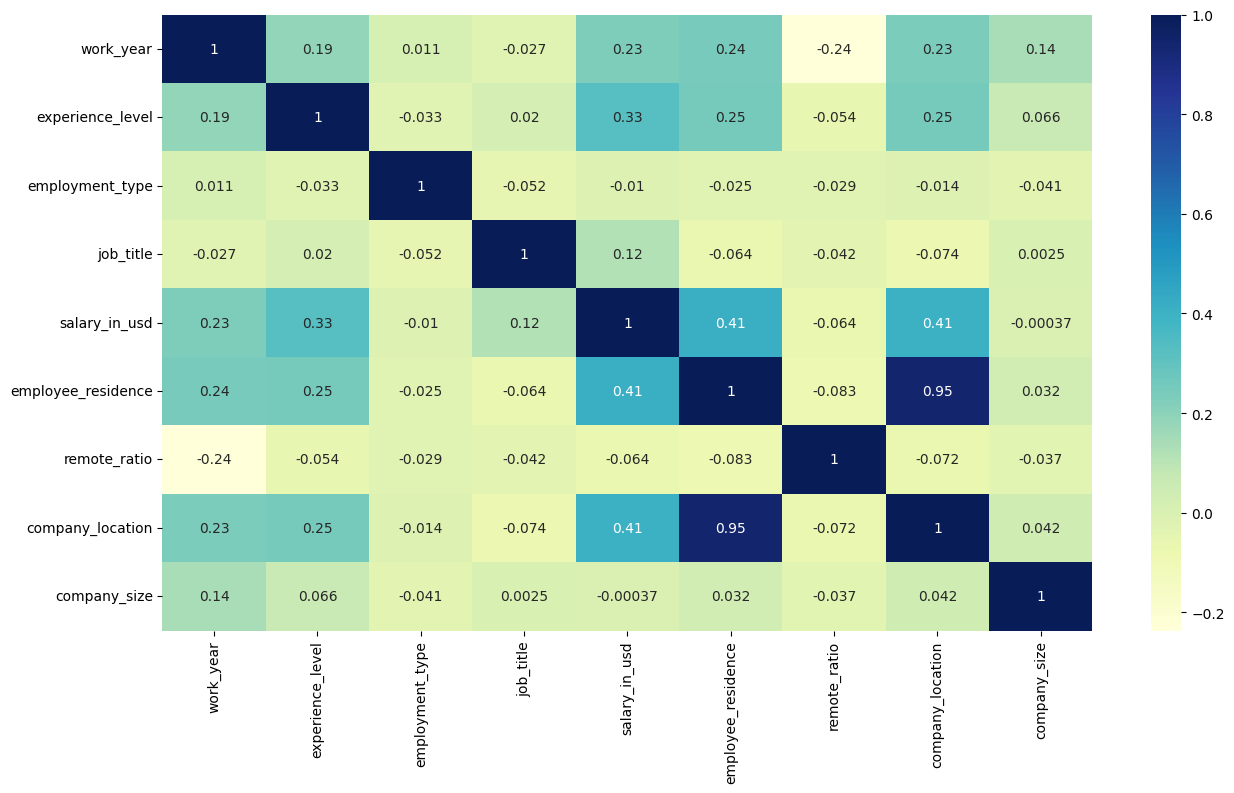

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [38]:
X = data.drop(['salary_in_usd'] , axis = 1)
Y = data['salary_in_usd']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, Y,test_size=0.35,random_state=0)

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
result = lr.predict(X_train)
import statsmodels.api as sm
ols = sm.OLS(result, X_train)
print(ols.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.581e+06
Date:                Sat, 06 Jan 2024   Prob (F-statistic):                        0.00
Time:                        18:28:29   Log-Likelihood:                         -21919.
No. Observations:                2440   AIC:                                  4.385e+04
Df Residuals:                    2432   BIC:                                  4.390e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

statsmodels kütüphanesi, istatistiksel modellerin oluşturulması, tahmin edilmesi ve analiz edilmesi için kullanılan bir Python kütüphanesidir.

In [42]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X_train,y_train)


print('Decision Tree OLS')
model4=sm.OLS(r_dt.predict(X_train),X_train)
print(model4.fit().summary())


Decision Tree OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              4144.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):                        0.00
Time:                        18:28:29   Log-Likelihood:                         -29171.
No. Observations:                2440   AIC:                                  5.836e+04
Df Residuals:                    2432   BIC:                                  5.840e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X_train,y_train.ravel())

print('Random Forest OLS')
model5=sm.OLS(rf_reg.predict(X_train),X_train)
print(model5.fit().summary())

Random Forest OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              5273.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):                        0.00
Time:                        18:28:29   Log-Likelihood:                         -28873.
No. Observations:                2440   AIC:                                  5.776e+04
Df Residuals:                    2432   BIC:                                  5.781e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [46]:
y_pred = rf_reg.predict(X_test)
y_tahmin = pd.DataFrame(data = y_pred)
y_tahmin.index = y_test.index

result = pd.concat([y_tahmin, y_test], axis=1)
result.columns = [["Tahmin","Gercek"]]
result

,Tahmin,Gercek
953,157939.444668,126000
2415,121020.166150,109000
3586,132216.666667,200000
2969,57789.616667,110000
3023,23446.500000,5723
...,...,...
878,157939.444668,252000
241,166733.894671,239000
1255,160773.551266,213580
340,113930.711271,85000


In [45]:

user_work_year = float(input("Çalışma yılınızı girin: "))
user_experience_level = float(input("Deneyim seviyenizi girin: "))
user_employment_type  = float(input("Employment_type  girin: "))
user_job_title  = float(input("job_title girin: "))
user_employee_residence = float(input("employee_residence girin: "))
user_remote_ratio = float(input("remote_ratio girin: "))
user_company_location = float(input("company_location   girin: "))
user_company_size = float(input("company_size girin: "))

user_input_scaled = sc.transform([[user_work_year, user_experience_level, user_employment_type, user_job_title, user_employee_residence, user_remote_ratio, user_company_location, user_company_size]])
user_salary_prediction = rf_reg.predict(user_input_scaled)

print(f"Tahmini maaş: {user_salary_prediction[0]}")


Çalışma yılınızı girin:  2023
Deneyim seviyenizi girin:  2
Employment_type  girin:  2
job_title girin:  66
employee_residence girin:  26
remote_ratio girin:  100
company_location   girin:  12
company_size girin:  1


Tahmini maaş: 77526.8


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
